In [3]:
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import json
import pandas as pd

In [4]:
#data = [{'name': 'vikash', 'age': 27}, {'name': 'Satyam', 'age': 14}]
#data = "ultimate_data_challenge.json"
#df = pd.DataFrame.from_dict(data, orient='columns')
logins_df = pd.read_json("logins.json")
logins_copy = logins_df.copy()

In [5]:
import json

file = open('ultimate_data_challenge.json', 'r')
ultimate_df = pd.DataFrame(json.load(file))
file.close()

ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [6]:
logins_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [7]:
logins_df.dtypes

login_time    datetime64[ns]
dtype: object

In [8]:
#dti = pd.DatetimeIndex(login_df['login_time'])

In [9]:
#login_df['count'] = 1

In [10]:
#login_df.head()

In [11]:
#agg_10m = df.groupby(pd.TimeGrouper(freq='10Min')).aggregate(numpy.sum) #or other function
#agg_15m = dti.groupby(Grouper(freq='15Min')).aggregate(numpy.sum) #or other function
#agg_15m = login_df.groupby(pd.Grouper(key='login_time', freq='15Min'))['count'].aggregate(np.sum)
#logins_df.reset_index('login_time', inplace=True)
#logins_df.reset_index()
#logins_df['count'] = 1
#logins_df.set_index('login_time', inplace=True)
#logins_df = logins_df.resample('15T').sum()

In [12]:
logins_df = logins_copy.copy()
#logins_df.reset_index()
logins_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            93132, 93133, 93134, 93135, 93136, 93137, 93138, 93139, 93140,
            93141],
           dtype='int64', length=93142)

## Part 1 ‐ Exploratory data analysis

#### The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

The below cell executes and stores logins counts in 15 minute time intervals. 

In [13]:
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_df = logins_df.resample('15T').sum()

In [14]:
logins_df.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


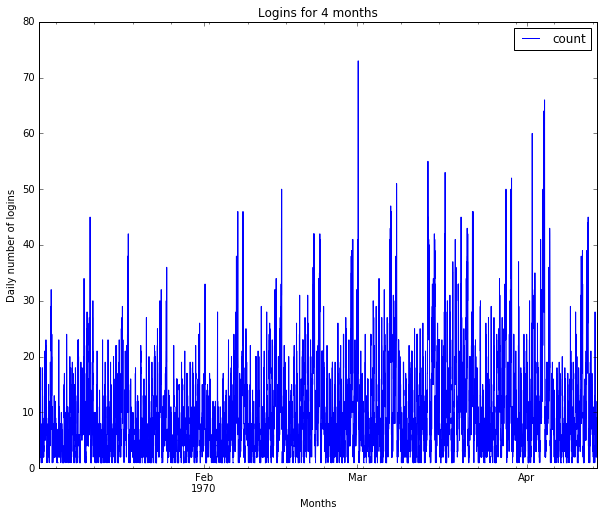

In [15]:
import matplotlib.pyplot as plt
#logins_df.dropna()
#plt.hist(logins_df['count'])
logins_df.plot(figsize=(10,8))
plt.title("Logins for 4 months")
plt.xlabel("Months")
plt.ylabel("Daily number of logins")
plt.show()

### Logins for the past 4 months

We can see a good steady trend on the daily number of logins. There is a peak in the month of March and the rest of the high points seem to be during the weekends

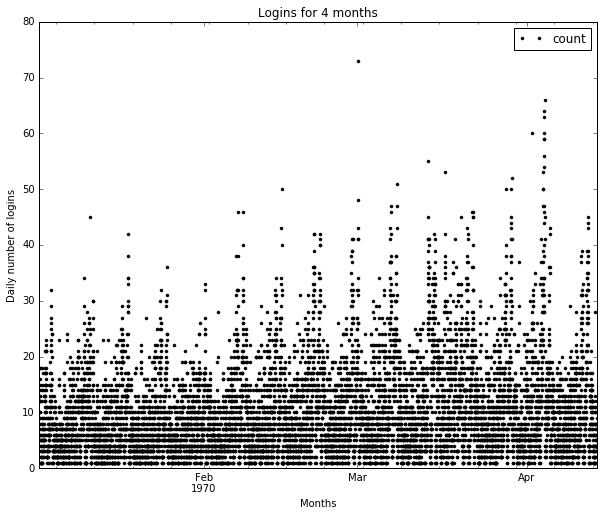

In [16]:
logins_df.plot(figsize=(10,8), style='k.')
plt.title("Logins for 4 months")
plt.xlabel("Months")
plt.ylabel("Daily number of logins")
plt.show()

Above is a better view of the login counts over the period of 4 months. We can see that the highest number of logins in a day has been in the month of march and is equal to 70. There has been very high number of login sin the month of April as well. The rest of the graph show a general good trend of the number of logins.

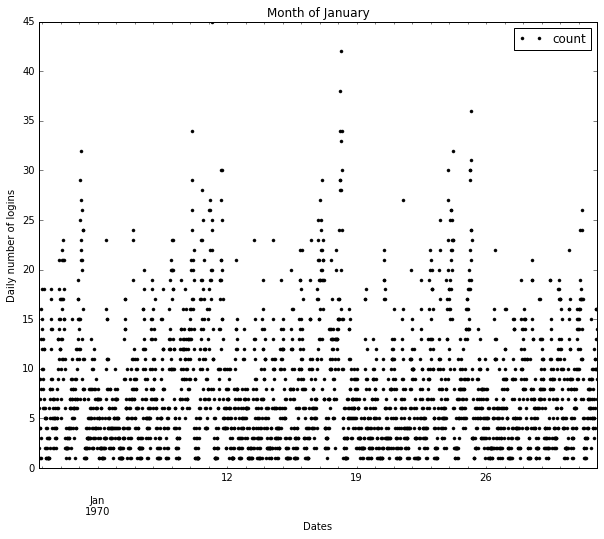

In [17]:
logins_df['1970-01-01':'1970-01-31'].plot(figsize=(10, 8), style='k.')
plt.title("Month of January")
plt.xlabel("Dates")
plt.ylabel("Daily number of logins")
plt.show()

Getting a more closer view on the number of logins for each month. We can see that there is a sinusoidal curve across the month. It looks more like the number of logins are pretty high during the weekends compared to the weekdays. The highest has been in the middle of the month that is around 43.

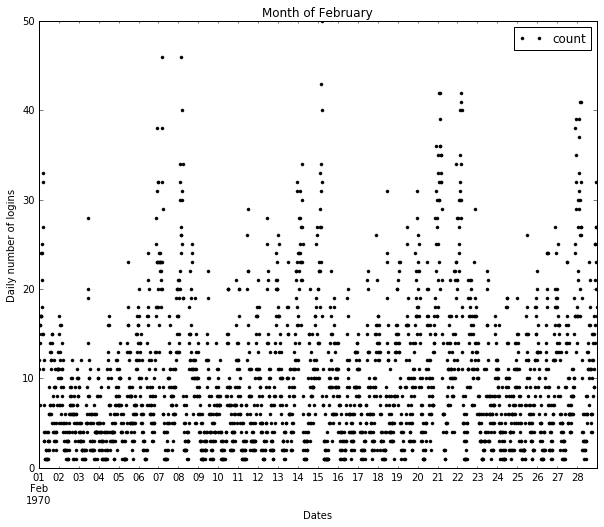

In [18]:
logins_df['1970-02-01':'1970-02-28'].plot(figsize=(10, 8), style='k.')
plt.title("Month of February")
plt.xlabel("Dates")
plt.ylabel("Daily number of logins")
plt.show()

February clearly has a higher number of login counts than the month of January.Getting a more closer view on the number of logins for each month. We can see that there is a sinusoidal curve across the month. It looks more like the number of logins are pretty high during the weekends compared to the weekdays. The highest has been in the middle of the month that is around 45 over the weekends mostly.

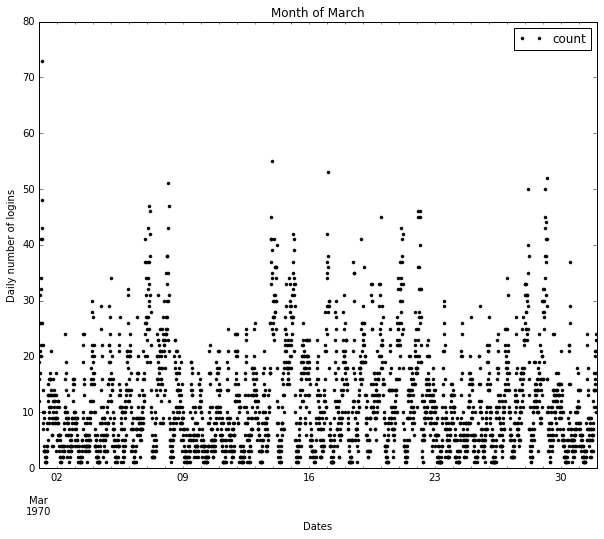

In [19]:
logins_df['1970-03-01':'1970-03-31'].plot(figsize=(10, 8), style='k.')
plt.title("Month of March")
plt.xlabel("Dates")
plt.ylabel("Daily number of logins")
plt.show()

March also has a similar trend as that of January and February. In fact March seems to have very high login count at the beginning of the month.Getting a more closer view on the number of logins for each month. We can see that there is a sinusoidal curve across the month. It looks more like the number of logins are pretty high during the weekends compared to the weekdays. The highest has been in the beginning of the month that is around 73.

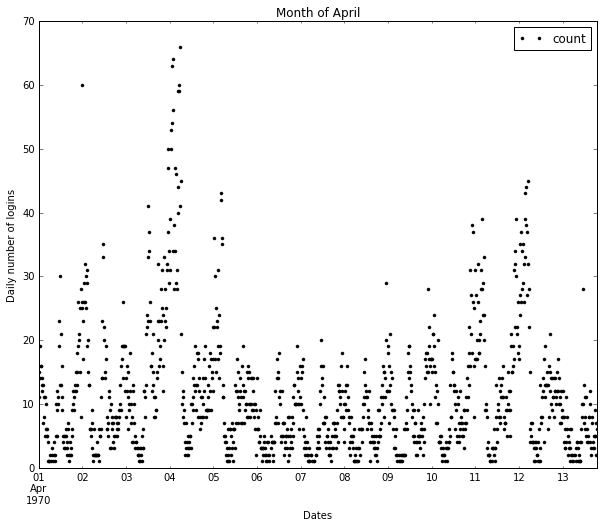

In [20]:
logins_df['1970-04-01':'1970-04-30'].plot(figsize=(10, 8), style='k.')
plt.title("Month of April")
plt.xlabel("Dates")
plt.ylabel("Daily number of logins")
plt.show()

The month of April seems to have kind of a downward trend in the number of logins. However, we can see the login counts around the range of 20-30 quite a lot in April and the highest being between 3 and 4 

In [21]:
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [22]:
ultimate_df.shape

(50000, 12)

In [25]:
ultimate_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,NaN,NaN,1.000000,0.000000,0.000000,33.300000
50%,3.880000,NaN,NaN,1.000000,0.000000,1.000000,66.700000
75%,6.940000,NaN,NaN,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


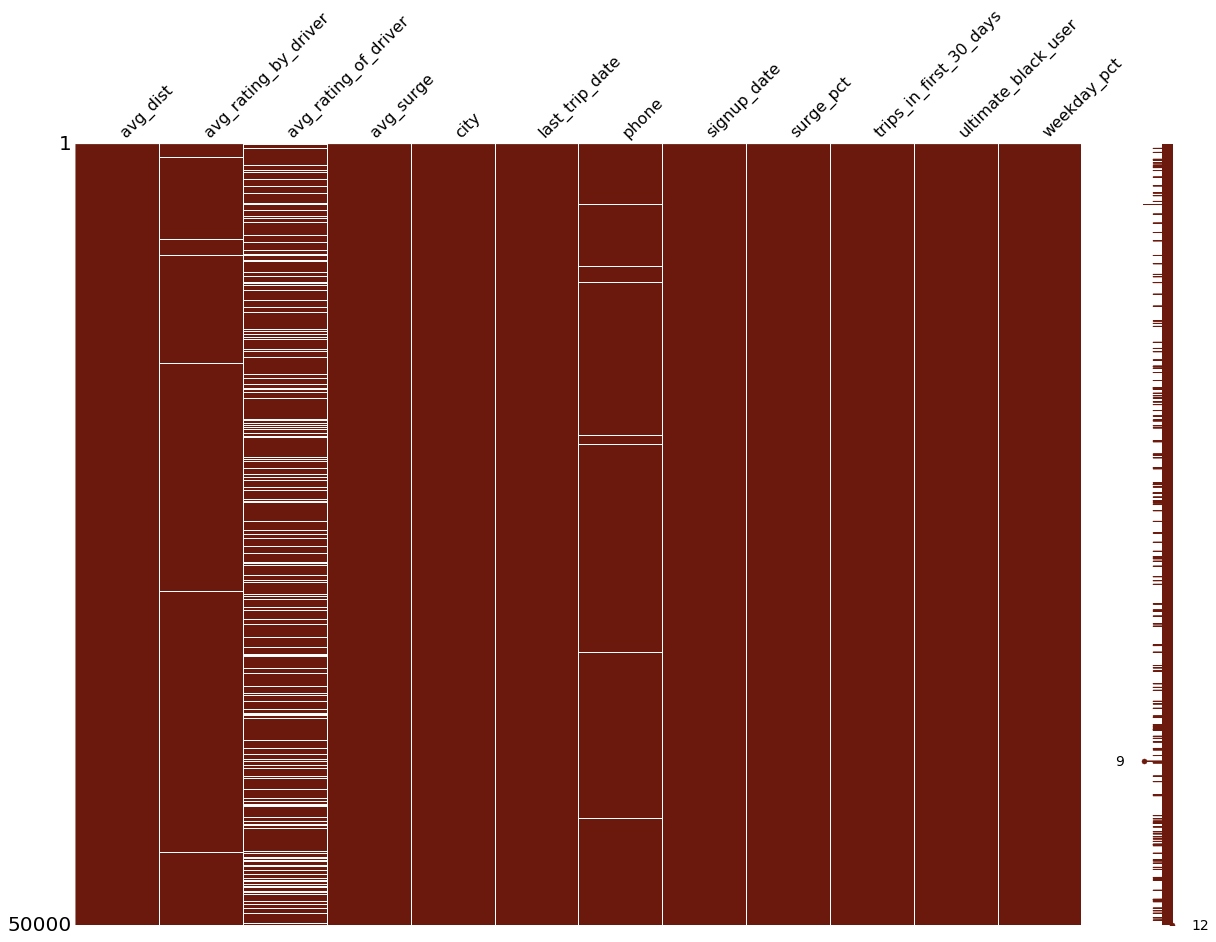

In [26]:
import numpy as np
md_copy = ultimate_df.copy()
md_copy = md_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=md_copy.iloc[:,0:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In the above graph we are visualizing the irregularities in the data, we have many NaN values in the avg_rating_of_driver column. I believe this column can be ignored or the NaN values can be replaced by 0 since the drivers are not rated. Ignoring the column would be more appropriate at the time as we have many missing values.

Similarly , we have some missing values in avg_rating_by_driver and phone columns which can be replaced by the mean values of the columns respectively.

The signup date and last_trip_date columns have data in object format which needs to be converted to datetime format and the phone and city columns have string values which can be replaced by categorical values for training purposes. These are the cleaning and transform functions which will be performed in the next in the notebook

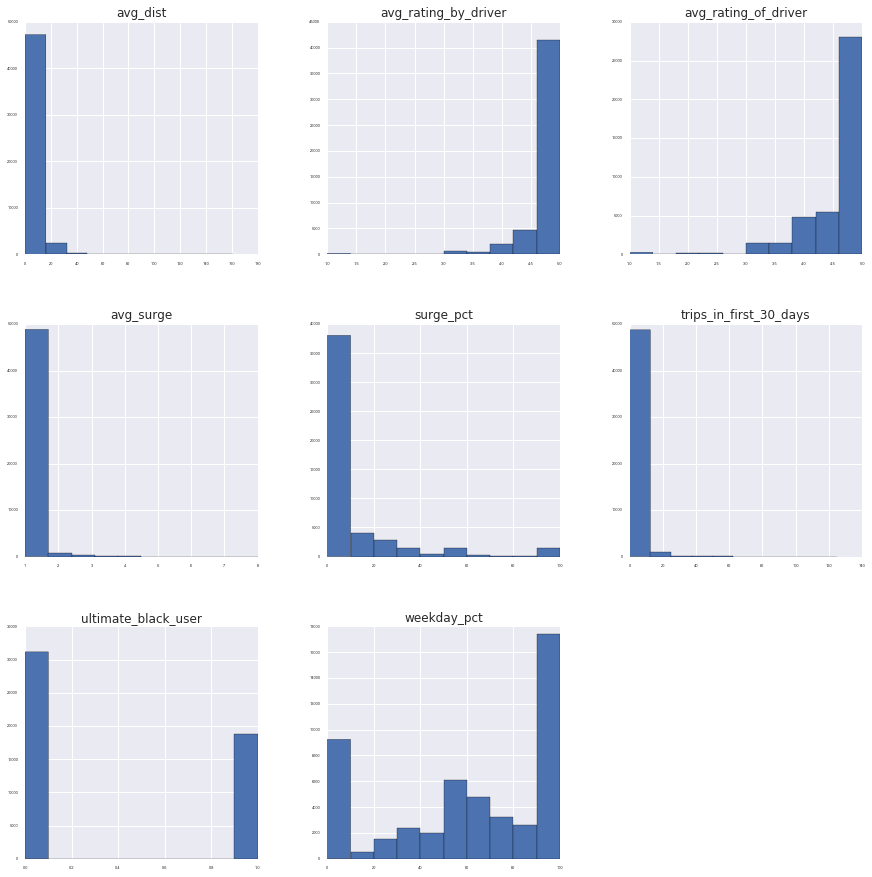

In [27]:
import seaborn as sns
sns.set()
ultimate_df.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(15, 15))
plt.show()

#### Above is the plot of the individual columns and their respective frequencies. We can observe there is pretty skewed trend in most of the graphs above. Lets take a closer look at the histograms of individual columns

In [28]:
ultimate_df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'ultimate_black_user',
       u'weekday_pct'],
      dtype='object')

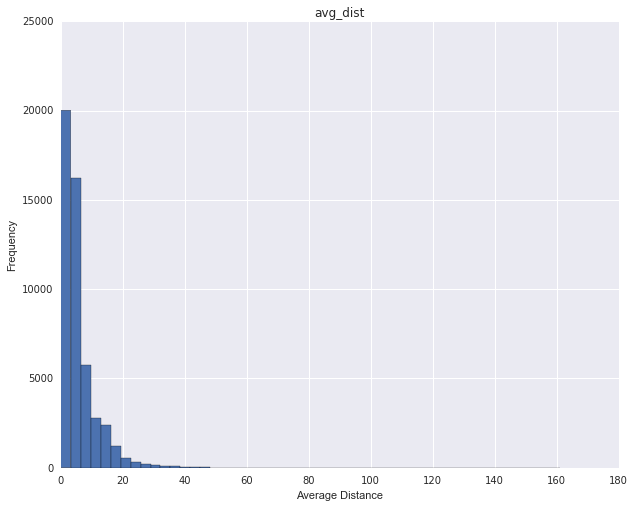

In [29]:
ultimate_df.hist('avg_dist', bins=50, figsize=(10,8))
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.show()

### avg_dist: the average distance in miles per trip taken in the first 30 days after signup
The average distance travelled by users is a skewed graph obviously with very high number of users travelling less distance on a daily basis.

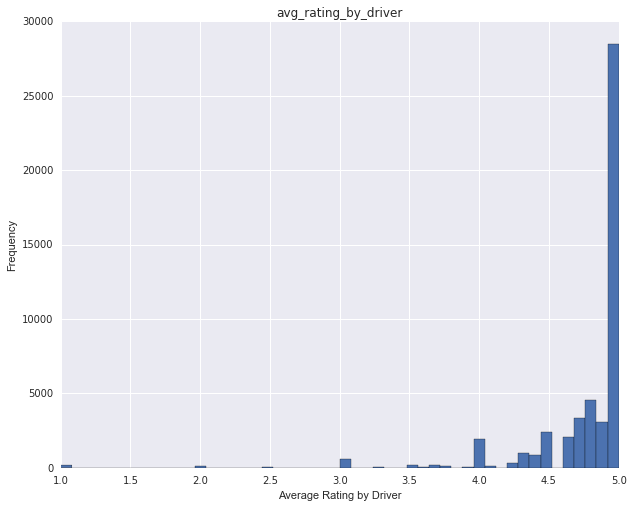

In [30]:
ultimate_df.hist('avg_rating_by_driver', bins=50,  figsize=(10,8))
plt.xlabel('Average Rating by Driver')
plt.ylabel('Frequency')
plt.show()

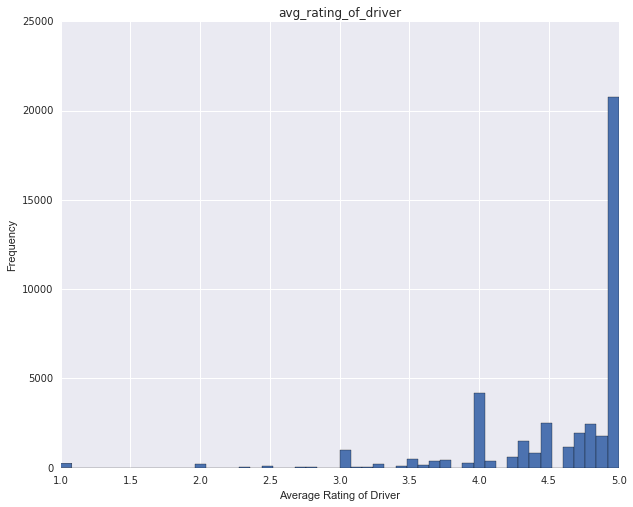

In [31]:
ultimate_df.hist('avg_rating_of_driver', bins=50,  figsize=(10,8))
plt.xlabel('Average Rating of Driver')
plt.ylabel('Frequency')
plt.show()

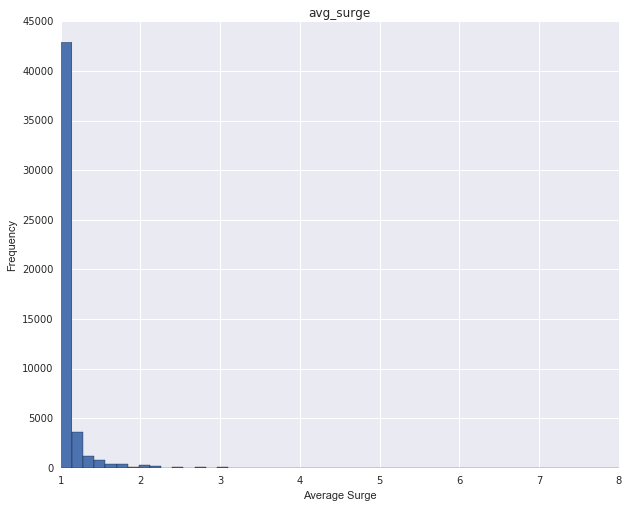

In [32]:
ultimate_df.hist('avg_surge', bins=50,  figsize=(10,8))
plt.xlabel('Average Surge')
plt.ylabel('Frequency')
plt.show()

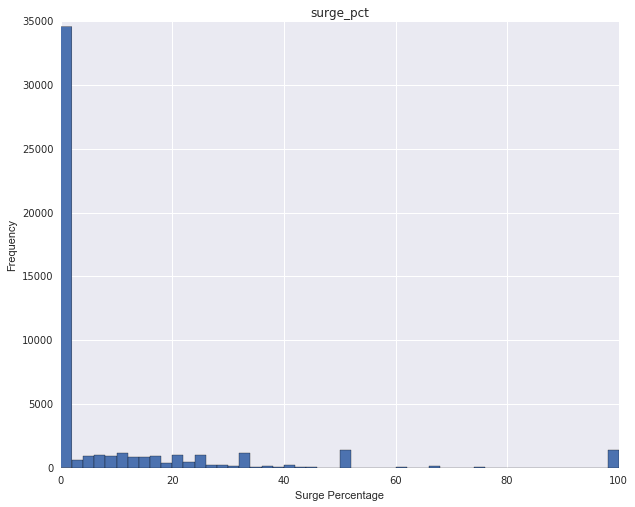

In [33]:
ultimate_df.hist('surge_pct', bins=50,  figsize=(10,8))
plt.xlabel('Surge Percentage')
plt.ylabel('Frequency')
plt.show()

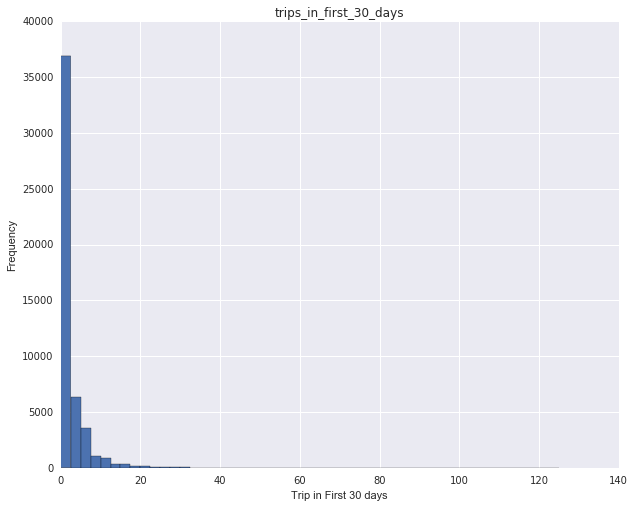

In [34]:
ultimate_df.hist('trips_in_first_30_days', bins=50,  figsize=(10,8))
plt.xlabel('Trip in First 30 days')
plt.ylabel('Frequency')
plt.show()

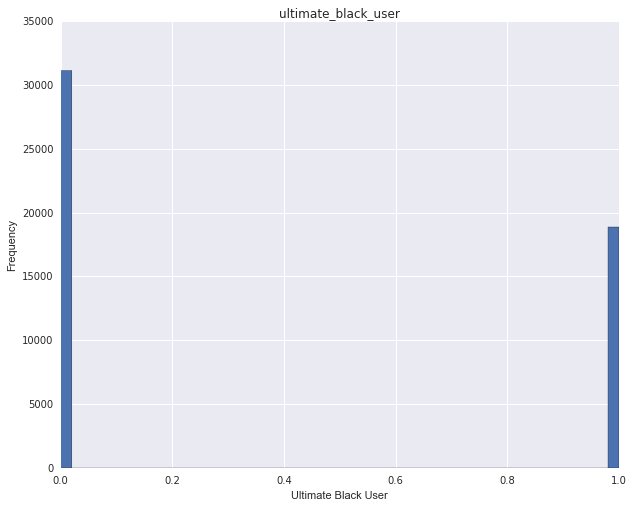

In [35]:

ultimate_df.hist('ultimate_black_user', bins=50,  figsize=(10,8))
plt.xlabel('Ultimate Black User')
plt.ylabel('Frequency')
plt.show()

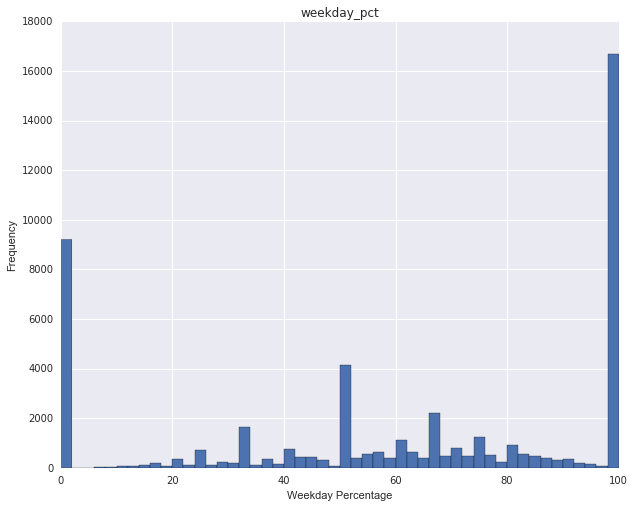

In [36]:
ultimate_df.hist('weekday_pct', bins=50,  figsize=(10,8))
plt.xlabel('Weekday Percentage')
plt.ylabel('Frequency')
plt.show()

In [37]:
ultimate_df['avg_rating_of_driver'] = ultimate_df['avg_rating_of_driver'].fillna(0)

In [38]:
ultimate_df['avg_rating_by_driver'] = ultimate_df['avg_rating_by_driver'].fillna(0)

In [39]:
ultimate_df['phone_cat'] = pd.Categorical.from_array(ultimate_df['phone']).labels
ultimate_df['city_cat'] = pd.Categorical.from_array(ultimate_df['city']).labels

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  


In [40]:
ultimate_df['phone_cat'] = ultimate_df['phone_cat'].fillna(0)

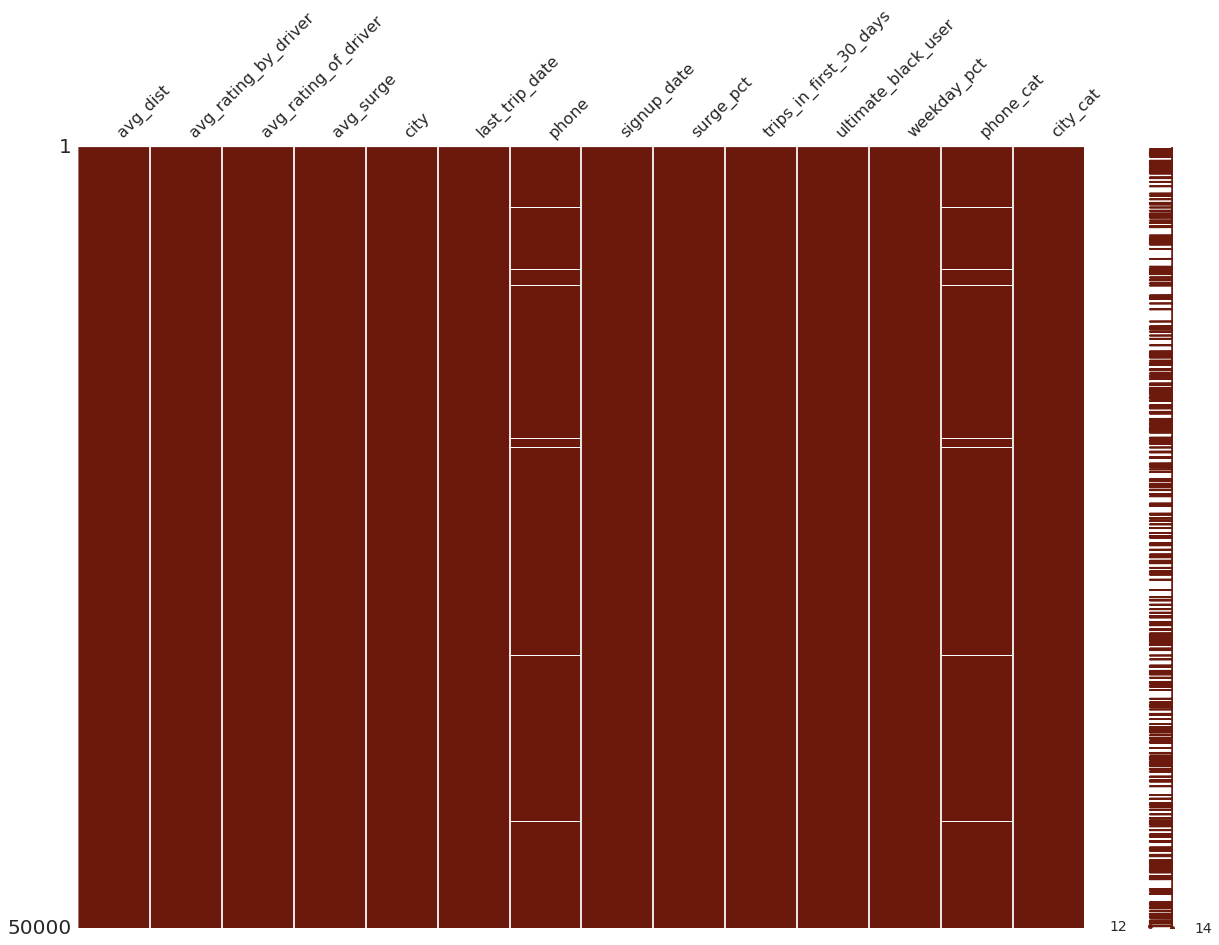

In [41]:
md_copy = ultimate_df.copy()
md_copy = md_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=md_copy.iloc[:,0:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [42]:
ultimate_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,phone_cat,city_cat
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.758950,3.854082,1.074764,8.849536,2.278200,60.926084,0.683720,1.136040
std,5.707357,0.538617,1.788881,0.222336,19.958811,3.792684,37.081503,0.481759,0.882558
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,2.420000,4.700000,4.000000,1.000000,0.000000,0.000000,33.300000,0.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,1.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000,2.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,2.000000


In [43]:
ultimate_df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          bool
weekday_pct               float64
phone_cat                    int8
city_cat                     int8
dtype: object

In [44]:
ultimate_df['last_trip_date'] =  pd.to_datetime(ultimate_df['last_trip_date'], format='%Y/%m/%d')

In [45]:
ultimate_df['signup_date'] =  pd.to_datetime(ultimate_df['signup_date'], format='%Y/%m/%d')

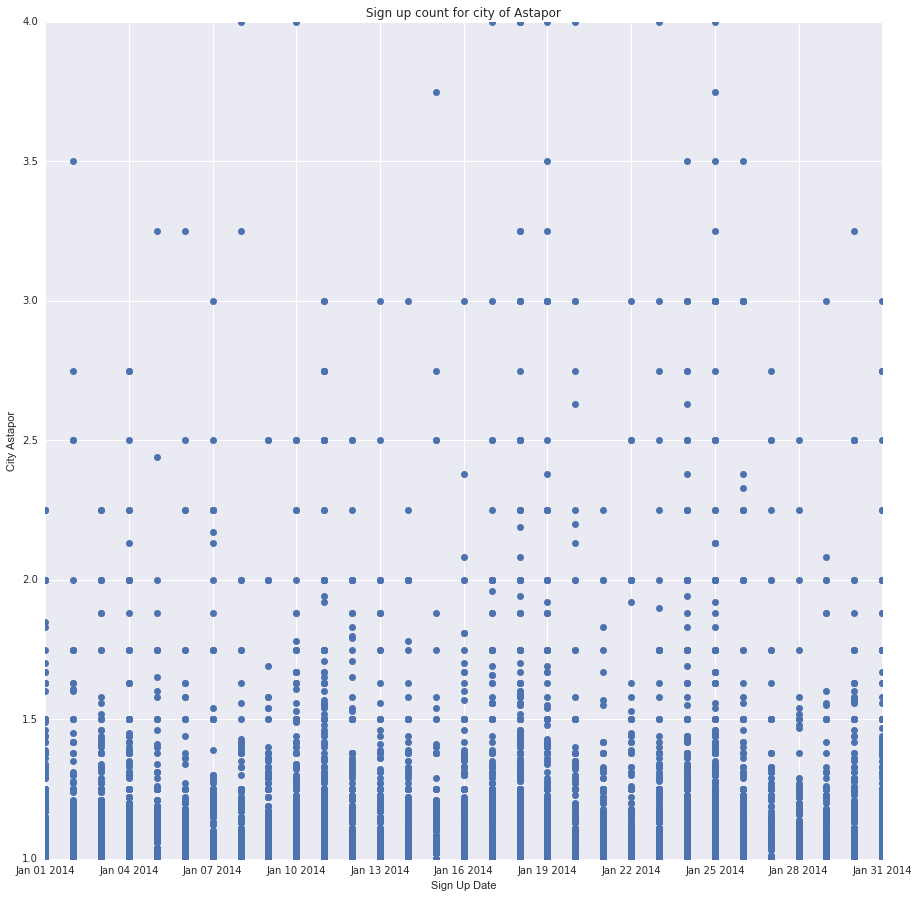

In [46]:
plt.figure(figsize=(15,15))
plt.plot(ultimate_df['signup_date'][ultimate_df['city']=='Astapor'], ultimate_df['avg_surge'][ultimate_df['city']=='Astapor'], linestyle = 'none', marker='o')
plt.title('Sign up count for city of Astapor')
plt.xlabel('Sign Up Date')
plt.ylabel('City Astapor')
plt.show()

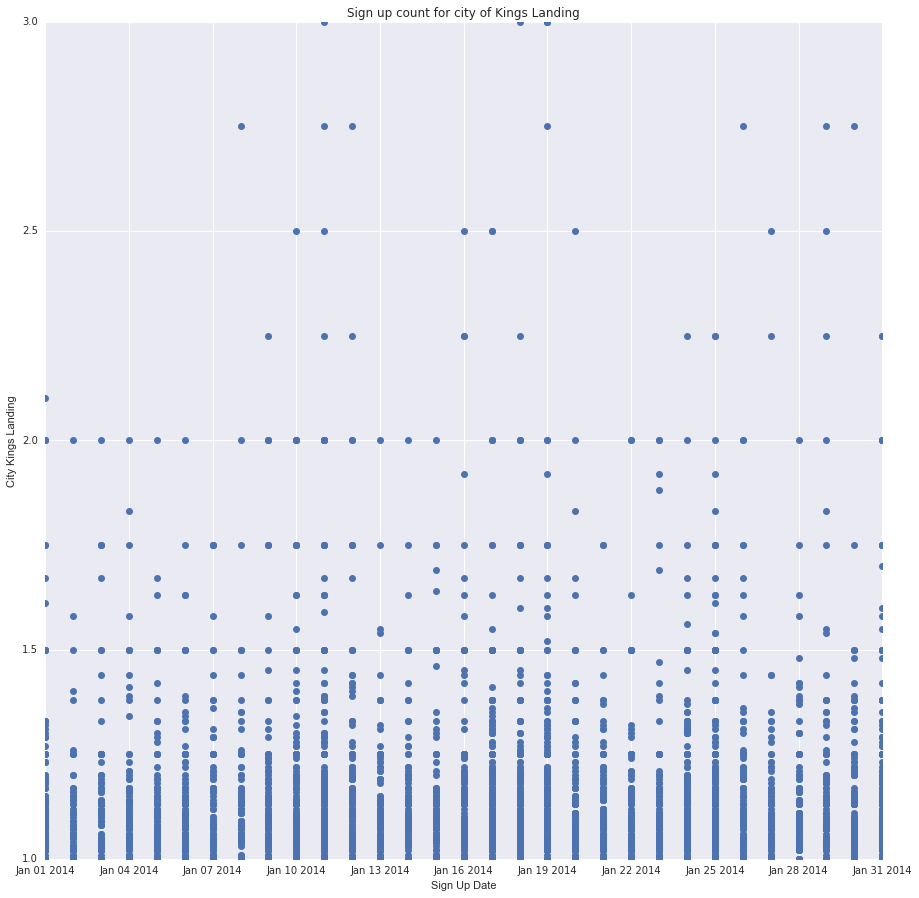

In [47]:
plt.figure(figsize=(15,15))
plt.plot(ultimate_df['signup_date'][ultimate_df['city']=="King's Landing"], ultimate_df['avg_surge'][ultimate_df['city']=="King's Landing"], linestyle = 'none', marker='o')
plt.title('Sign up count for city of Kings Landing')
plt.xlabel('Sign Up Date')
plt.ylabel('City Kings Landing')
plt.show()

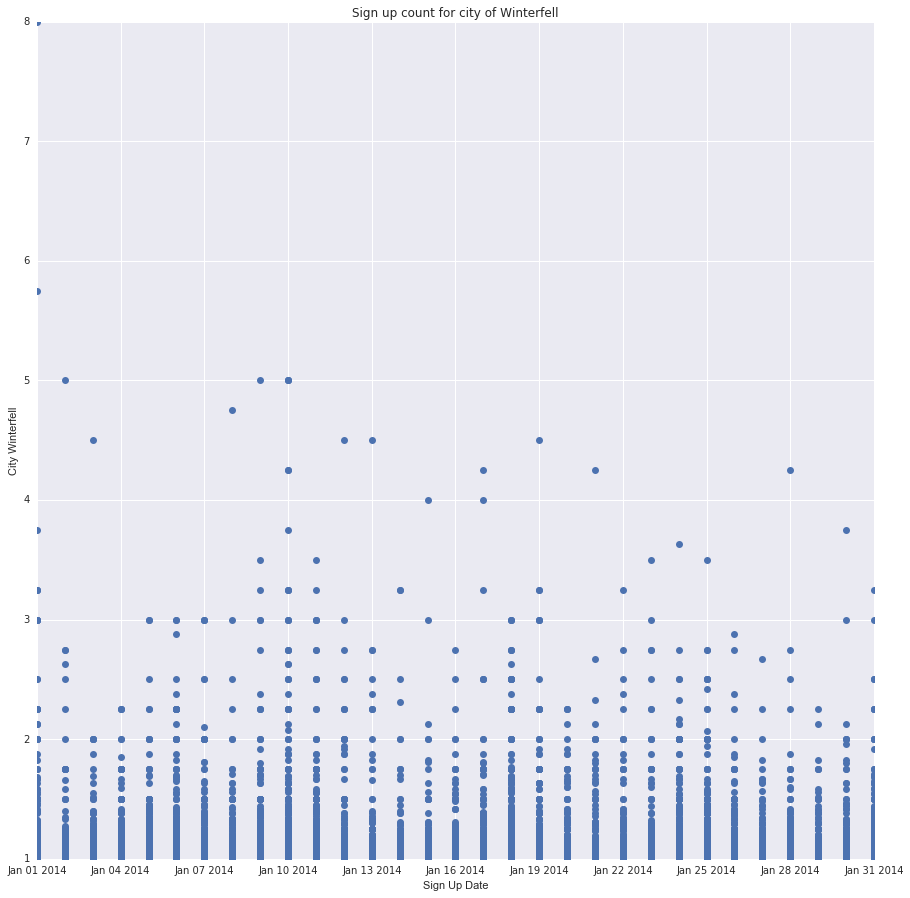

In [48]:
plt.figure(figsize=(15,15))
plt.plot(ultimate_df['signup_date'][ultimate_df['city']=="Winterfell"], ultimate_df['avg_surge'][ultimate_df['city']=="Winterfell"], linestyle = 'none', marker='o')
plt.title('Sign up count for city of Winterfell')
plt.xlabel('Sign Up Date')
plt.ylabel('City Winterfell')
plt.show()

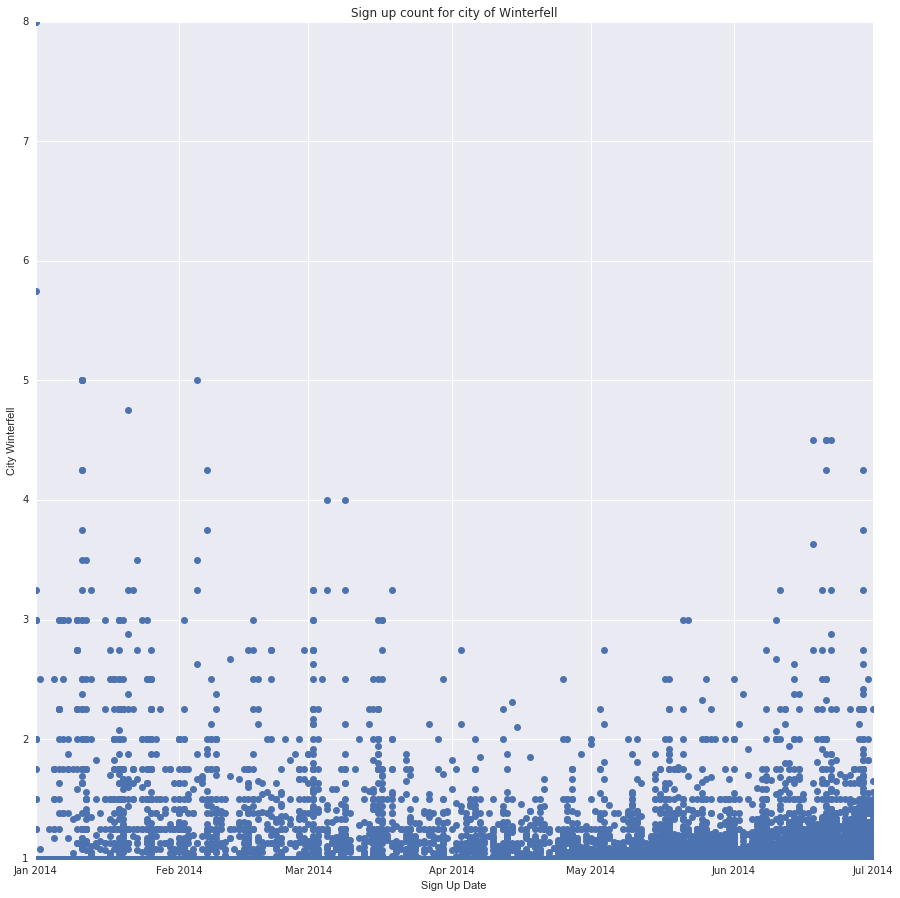

In [49]:
plt.figure(figsize=(15,15))
plt.plot(ultimate_df['last_trip_date'][ultimate_df['city']=="Winterfell"], ultimate_df['avg_surge'][ultimate_df['city']=="Winterfell"], linestyle = 'none', marker='o')
plt.title('Sign up count for city of Winterfell')
plt.xlabel('Sign Up Date')
plt.ylabel('City Winterfell')
plt.show()

In [50]:
recent_date = ultimate_df['last_trip_date'].max()
recent_date

Timestamp('2014-07-01 00:00:00')

In [51]:
recent_signup_date = ultimate_df['signup_date'].max()
oldest_signup_date = ultimate_df['signup_date'].min()
print recent_signup_date, oldest_signup_date

2014-01-31 00:00:00 2014-01-01 00:00:00


In [52]:
#ultimate_df['Label'] = np.NaN

In [53]:
#Create the target variable, retained

ultimate_df['Label'] = np.nan
ultimate_df.loc[ultimate_df['last_trip_date'] >= '2014-06-01', 'Label'] = 1
ultimate_df.loc[ultimate_df['last_trip_date'] < '2014-06-01', 'Label'] = 0

In [54]:
ultimate_df['Label'].head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: Label, dtype: float64

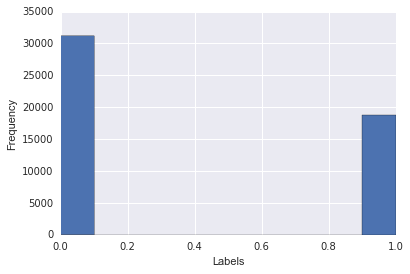

In [55]:
plt.hist(ultimate_df['Label'])
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

In [56]:
print(ultimate_df.groupby('Label').size())

Label
0.0    31196
1.0    18804
dtype: int64


In [57]:
ultimate_df.columns

Index([              u'avg_dist',   u'avg_rating_by_driver',
         u'avg_rating_of_driver',              u'avg_surge',
                         u'city',         u'last_trip_date',
                        u'phone',            u'signup_date',
                    u'surge_pct', u'trips_in_first_30_days',
          u'ultimate_black_user',            u'weekday_pct',
                    u'phone_cat',               u'city_cat',
                        u'Label'],
      dtype='object')

In [58]:
new_df = ultimate_df[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','surge_pct', 'trips_in_first_30_days','ultimate_black_user','weekday_pct','phone_cat','city_cat','Label']]

## Part 2 ‐ Experiment and metrics design
#### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

#### However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


### Answer 1:

There can be some set of drivers who can be used only for the two way toll. This could lead to getting toll prices at a discount on maybe a monthly or weekly basis. These drivers can be exclusive for crossing the bridge and with the toll at a reduced price. Apart from that another option that can be used the driver who are located very close to the two way bridge for both the cities can be made inclusive for both the cities such that they are accepting rides for both cities and it would be easier for them to get back after their shift.

### Answer 2:
a. User signing up near the toll bridge can be made exclusive for both cities without accepting rides for intercities. The number of rides per driver can be checked who are using the toll road and if the number of rides are not effecting the normal rides in the city.

b. A Z statistic can be used to perform this experiment by comparing the older price consumption versus the newer version.

c. The results can be depending on the revenue consumption in this experiment. If it has lower costs, it can be accepted and can be further used to make recommendations

## Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in

January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. 

Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

#### The cleaning is performed earlier by removing the outliers and replacing the NaNs in the dataset. Below we are selecting the columns and storing it in the dataset which will be further used for performing predictions.


In [59]:
# Recheck the count
# Separate the dataframe for input(X) and output variables(y)

new_df['ultimate_black_user'] = pd.Categorical.from_array(new_df['ultimate_black_user']).labels
new_df[['trips_in_first_30_days','ultimate_black_user','phone_cat','city_cat']] = new_df[['trips_in_first_30_days','ultimate_black_user','phone_cat','city_cat']].astype(float)
#new_df['phone'] = pd.Categorical.from_array(new_df['phone']).labels
new_df = new_df.fillna(0)
X = new_df.loc[:,'avg_dist':'city_cat']
y = new_df.loc[:,'Label']
# Set the validation size, i.e the test set to 20%
validation_size = 0.30
# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
#train_size = int(len(X.index) * 0.7)
#print(len(y))
#print(train_size)
#X_train, X_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
#y_train, y_test = y[0:train_size+1], y.loc[train_size: len(X.index)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=42)
#print('Observations: %d' % (len(X.index)))
#print('X Training Observations: %d' % (len(X_train.index)))
#print('X Testing Observations: %d' % (len(X_test.index)))
#print('y Training Observations: %d' % (len(y_train)))
#print('y Testing Observations: %d' % (len(y_test)))
#pyplot.plot(X_train['Objectivity'])
#pyplot.plot([None for i in X_train['Objectivity']] + [x for x in X_test['Objectivity']])
#pyplot.show()
num_folds = 10
scoring = 'accuracy'
# Append the models to the models list
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
#models.append(('XGBoost', XGBClassifier()))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k

In [60]:
# Evaluate each algorithm for accuracy
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.696914 (0.008130)
LDA: 0.696143 (0.008466)
KNN: 0.741171 (0.005864)
CART: 0.709657 (0.006044)
NB: 0.670914 (0.009294)
SVM: 0.752771 (0.004635)
RF: 0.758286 (0.004965)


In [61]:
from xgboost import XGBClassifier
clf = XGBClassifier()
kfold = KFold(n_splits=num_folds, random_state=42)
cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % ("XGB", cv_results.mean(), cv_results.std())
print(msg)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGB: 0.787600 (0.004634)


In [62]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
# estimate accuracy on validation dataset
#rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(X_test)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.780533333333
confusion matrix: 
[[8003 1376]
 [1916 3705]]
classification report: 
             precision    recall  f1-score   support

        0.0       0.81      0.85      0.83      9379
        1.0       0.73      0.66      0.69      5621

avg / total       0.78      0.78      0.78     15000



After using multiple machine learning models for fitting and performing predictions, we can see that XGBoost is clearly performing better than the other models.

After performing the predictions, we can see that the accuracy of the model is around 78% which is pretty high for predicting if a customer will be retained.

We have a very high precision, recall and F1 score which is a very good metric for evaluating the performance of the model.We can see that precision , recall and f score is around 0.78 which is very good and can be considered as a good performing model.

Below is the plot for the feature importances in the model.  We see that city, weeday percentage and trip  in the first thirty days are the fetures highly effecting the performance of the model. Hence these can be used to further improve the performance of the model.

In [63]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

features = new_df.drop(['Label'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(model_xgb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Feature importance for XGBoost ',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances for XGBoost',
     width = 1000, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

 Lets check the labels series. When we check the label values, we can see that the classes are not balanced or uneven. We have around 31196 0 labelled classes and  18804 classes which are labelled 1. So it is clear that the labels are quite uneven and there are more 0's than 1's. This could lead to the model not being able to generalize 1's that well and end up in predicting more 0's than 1's.
 
 
### What is the solution to this?
 
 We want the 1's to be equal to the number of 0's. There is a library Random Over Sampler which can do the job for us.
 RandomOverSampler adds addition rows to the dataset making the 1s equal to 0s. We are performing the same in the below cells. After performing random over sampling , we can observe that now the 0s and 1s are equal and number is 31196

In [65]:
print("Size of the Labels column")
print(new_df.groupby('Label').size())

Size of the Labels column
Label
0.0    31196
1.0    18804
dtype: int64


In [67]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, ratio = 1.0)

#X = training_df.loc[:,'id':'ps_calc_20_bin']
#y = training_df.loc[:,'target']
X1 = new_df.loc[:,'avg_dist':'city_cat']
y1 = new_df.loc[:,'Label']
X_res, y_res = sm.fit_sample(X1, y1)

print(list(y_res).count(0))
print(list(y_res).count(1))

31196
31196


#### Now lets retrain the models with the newly created dataset.
#### We can observe below that the accuracy in the models have clearly increased. In the previous model, the best accuracy score was 78%, this time we have Random Forests scoring 79% without any fine tuning.

In [68]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=validation_size, random_state=42)

# Evaluate each algorithm for accuracy
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=42)
    cv_results = cross_val_score(model, X_train1, y_train1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.656844 (0.005959)
LDA: 0.658195 (0.006272)
KNN: 0.761254 (0.007277)
CART: 0.746256 (0.002680)
NB: 0.674543 (0.008949)
SVM: 0.754087 (0.008652)
RF: 0.795645 (0.003666)


#### Lets try and train our XGBoost model whihc was performing the best. Training and testing the validity , we get an accuracy score of a whooping 80% 

In [69]:
clf1 = XGBClassifier()
kfold = KFold(n_splits=num_folds, random_state=42)
cv_results = cross_val_score(clf1, X_train1, y_train1, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % ("XGB", cv_results.mean(), cv_results.std())
print(msg)

XGB: 0.807506 (0.004675)


In [70]:
model_xgb1 = XGBClassifier()
model_xgb1.fit(X_train1, y_train1)
# estimate accuracy on validation dataset
#rescaledValidationX = scaler.transform(X_test)
predictions1 = model_xgb1.predict(X_test1)
print("accuracy score:")
print(accuracy_score(y_test1, predictions1))
print("confusion matrix: ")
print(confusion_matrix(y_test1, predictions1))
print("classification report: ")
print(classification_report(y_test1, predictions1))

accuracy score:
0.803878619511
confusion matrix: 
[[7670 1627]
 [2044 7377]]
classification report: 
             precision    recall  f1-score   support

        0.0       0.79      0.82      0.81      9297
        1.0       0.82      0.78      0.80      9421

avg / total       0.80      0.80      0.80     18718



The classification report can be seen above. Now lets try and fine tune our XGBoost model a little more.
Lets fine tune the model on different values of n_estimators and max_depth which are parameters of the XGBoost classifier.

The values we will use for n estimators and max depth is as follows.
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

We will loop over the combination of each of the above lists and check to see which parameters are giving the best accuracy.

After running the the model on multiple combinations of the parameters, we can see below that the model performs the best at max depth of 6 and number f estimators being 500.

# The accuracy of the model is now increased up to 82%.

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib

matplotlib.use('Agg')
#model_xg = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(X_train1, y_train1)
        y_pred = model.predict(X_test1)
        score = accuracy_score(y_test1, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Score is 0.780158136553 at depth of 1 and estimator 150
Score is 0.800459450796 at depth of 2 and estimator 150
Score is 0.806496420558 at depth of 3 and estimator 150
Score is 0.811304626563 at depth of 4 and estimator 150
Score is 0.814296399188 at depth of 5 and estimator 150
Score is 0.81621968159 at depth of 6 and estimator 150
Score is 0.815792285501 at depth of 7 and estimator 150
Score is 0.815204615878 at depth of 8 and estimator 150
Score is 0.817555294369 at depth of 9 and estimator 150
Score is 0.815578587456 at depth of 10 and estimator 150
Score is 0.813334757987 at depth of 11 and estimator 150
Score is 0.813388182498 at depth of 12 and estimator 150
Score is 0.786622502404 at depth of 1 and estimator 200
Score is 0.80291697831 at depth of 2 and estimator 200
Score is 0.81071695694 at depth of 3 and estimator 200
Score is 0.813067635431 at depth of 4 and estimator 200
Score is 0.815685436478 at depth of 5 and estimator 200
Score is